#Analisando as notas gerais

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [41]:
import matplotlib.pyplot as plt

In [85]:
notas = pd.read_csv('data_science/introduction/data/ratings.csv')
notas.head()

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [86]:
notas.shape

(100836, 4)

In [87]:
notas.columns = ['usuarioId','filmeId','nota','momento']
notas.head()

usuarioId  filmeId  nota    momento
0          1        1   4.0  964982703
1          1        3   4.0  964981247
2          1        6   4.0  964982224
3          1       47   5.0  964983815
4          1       50   5.0  964982931

In [88]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [89]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [90]:
print("Média: ", notas.nota.mean())
print("Mediana: ", notas.nota.median())

Média:  3.501556983616962
Mediana:  3.5


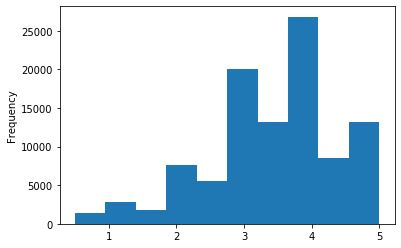

In [91]:
notas.nota.plot(kind='hist')

In [92]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [122]:
import seaborn as sns

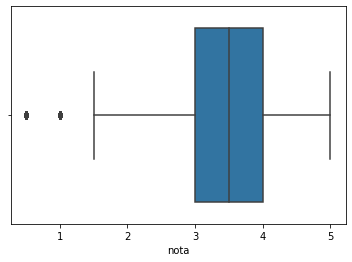

In [123]:
sns.boxplot(notas.nota)

#Olhando os filmes

In [151]:
filmes = pd.read_csv('data_science/introduction/data/movies.csv')

filmes.columns = ['filmeId','titulo','genero']
filmes.head()

filmeId                              titulo  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genero  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

#Analisando notas especificas por filme

In [152]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [153]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [154]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

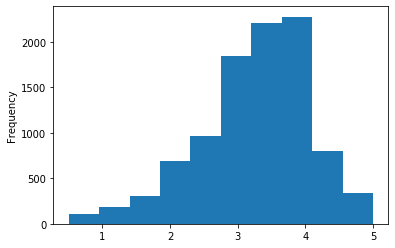

In [155]:
medias_por_filme.plot(kind='hist')

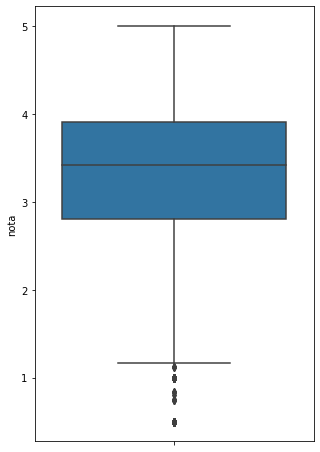

In [156]:
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [157]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

In [158]:
sns.distplot(medias_por_filme)

Text(0.5, 1.0, 'Historiograma das médias dos filmes')

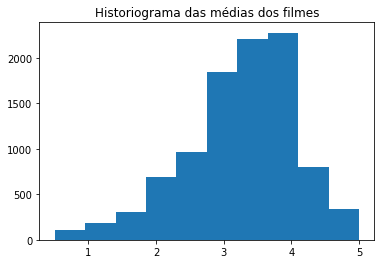

In [159]:
plt.hist(medias_por_filme)
plt.title('Historiograma das médias dos filmes')

In [178]:
tmdb = pd.read_csv('data_science/introduction/data/tmdb_5000_movies.csv')
tmdb.head()

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
4  [{"id": 818, "name": "based on novel"}, {"id":...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   
3  Following the death of District Attorney Harve...  112.312950   
4  John Carter is a war-weary, former military ca...   43.926995   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   
3  [{"name": "Legendary Pictures", "id": 923}, {"...   
4        [{"name": "Walt Disney Pictures", "id": 2}]   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   880674609   
3  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16  1084939099   
4  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   284139100   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3    165.0           [{"iso_639_1": "en", "name": "English"}]  Released   
4    132.0           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466  
3                     The Dark Knight Rises           7.6        9106  
4                               John Carter           6.1        2124

In [179]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [180]:
contagem_de_linguas = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_linguas.columns = ["original_language","total"]
contagem_de_linguas.head()

original_language  total
0                en   4505
1                fr     70
2                es     32
3                zh     27
4                de     27

In [181]:
sns.barplot(x= 'original_language',y='total',data=contagem_de_linguas)

In [182]:
sns.catplot(x='original_language',kind='count',data=tmdb)

([<matplotlib.patches.Wedge at 0x11a7fa400>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.37103399401244586, 'fr'),
  Text(1.0579676486019882, -0.30117180231817847, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882624, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.1084677842516155, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357273, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(1

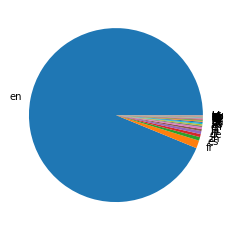

In [183]:
plt.pie(contagem_de_linguas["total"],labels = contagem_de_linguas["original_language"])

In [184]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral=total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto=total_geral-total_de_ingles
print(total_geral,total_do_resto)

4803 298


In [185]:
dados = {
    'lingua':['ingles','outros'],
    'total':[total_geral,total_do_resto]
}
dados = pd.DataFrame(dados)

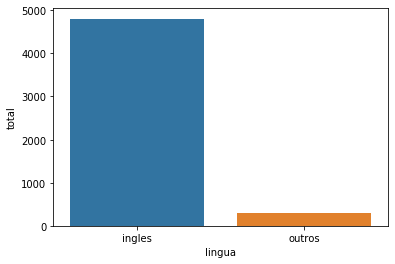

In [186]:
sns.barplot(x='lingua',y='total', data=dados)

In [187]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
filmes_sem_lingua_original_em_ingles.head()

budget                                             genres  \
97   15000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
235  97250400  [{"id": 14, "name": "Fantasy"}, {"id": 12, "na...   
317  94000000  [{"id": 18, "name": "Drama"}, {"id": 36, "name...   
474         0  [{"id": 9648, "name": "Mystery"}, {"id": 18, "...   
492   8000000  [{"id": 35, "name": "Comedy"}, {"id": 16, "nam...   

                                              homepage      id  \
97                                                 NaN  315011   
235  http://www.asterixauxjeuxolympiques.com/index.php    2395   
317               http://www.theflowersofwarmovie.com/   76758   
474                                                NaN  330770   
492                                                NaN  293644   

                                              keywords original_language  \
97   [{"id": 1299, "name": "monster"}, {"id": 7671,...                ja   
235  [{"id": 271, "name": "competition"}, {"id": 12...                fr   
317  [{"id": 173251, "name": "forced prostitution"}...                zh   
474  [{"id": 428, "name": "nurse"}, {"id": 658, "na...                fr   
492                     [{"id": 209714, "name": "3d"}]                es   

                         original_title  \
97                               シン・ゴジラ   
235         Astérix aux Jeux Olympiques   
317                               金陵十三釵   
474                           Évolution   
492  Don Gato: El inicio de la pandilla   

                                              overview  popularity  \
97   From the mind behind Evangelion comes a hit la...    9.476999   
235  Astérix and Obélix have to win the Olympic Gam...   20.344364   
317  A Westerner finds refuge with a group of women...   12.516546   
474  11-year-old Nicolas lives with his mother in a...    3.300061   
492  Top Cat has arrived to charm his way into your...    0.719996   

                                  production_companies  \
97   [{"name": "Cine Bazar", "id": 5896}, {"name": ...   
235  [{"name": "Constantin Film", "id": 47}, {"name...   
317  [{"name": "Beijing New Picture Film Co. Ltd.",...   
474  [{"name": "Ex Nihilo", "id": 3307}, {"name": "...   
492  [{"name": "Anima Estudios", "id": 9965}, {"nam...   

                                  production_countries release_date  \
97             [{"iso_3166_1": "JP", "name": "Japan"}]   2016-07-29   
235  [{"iso_3166_1": "BE", "name": "Belgium"}, {"is...   2008-01-13   
317  [{"iso_3166_1": "CN", "name": "China"}, {"iso_...   2011-12-15   
474  [{"iso_3166_1": "BE", "name": "Belgium"}, {"is...   2015-09-14   
492  [{"iso_3166_1": "IN", "name": "India"}, {"iso_...   2015-10-30   

       revenue  runtime                                   spoken_languages  \
97    77000000    120.0  [{"iso_639_1": "it", "name": "Italiano"}, {"is...   
235  132900000    116.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...   
317   95311434    145.0  [{"iso_639_1": "zh", "name": "\u666e\u901a\u8b...   
474          0     81.0     [{"iso_639_1": "fr", "name": "Fran\u00e7ais"}]   
492          0     89.0                                                 []   

       status                          tagline                         title  \
97   Released  A god incarnate. A city doomed.                 Shin Godzilla   
235  Released                              NaN  Asterix at the Olympic Games   
317  Released                              NaN            The Flowers of War   
474  Released                              NaN                     Evolution   
492  Released                              NaN                Top Cat Begins   

     vote_average  vote_count  
97            6.5         143  
235           5.0         471  
317           7.1         187  
474           6.4          47  
492           5.3           9

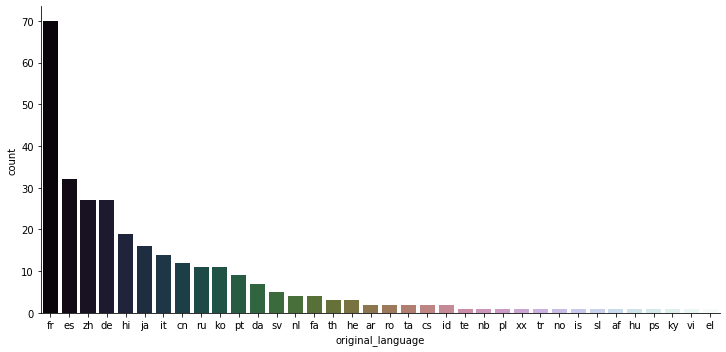

In [188]:
sns.catplot(
    x='original_language',
    kind='count',
    data=filmes_sem_lingua_original_em_ingles,
    aspect=2,
    palette="cubehelix",
    order=total_por_lingua_de_outros_filmes.index)

In [189]:
filmes.head(2)

filmeId            titulo                                       genero
0        1  Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
1        2    Jumanji (1995)                   Adventure|Children|Fantasy

In [190]:
notas_toy_story = notas.query('filmeId==1')
notas_jumanji = notas.query('filmeId==2')

In [191]:
print("Nota média do Toy Story: %.2f"% notas_toy_story.nota.mean())
print("Nota média do Jumanji: %.2f"% notas_jumanji.nota.mean())

Nota média do Toy Story: 3.92
Nota média do Jumanji: 3.43


In [192]:
print("Nota mediana do Toy Story: %.2f"% notas_toy_story.nota.median())
print("Nota mediana do Jumanji: %.2f"% notas_jumanji.nota.median())

Nota mediana do Toy Story: 4.00
Nota mediana do Jumanji: 3.50


{'whiskers': [<matplotlib.lines.Line2D at 0x11ab68160>,
 'caps': [<matplotlib.lines.Line2D at 0x11ab687c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11ab58d90>,
 'medians': [<matplotlib.lines.Line2D at 0x11ab68e20>,
 'fliers': [<matplotlib.lines.Line2D at 0x11ab58d30>,
 'means': []}

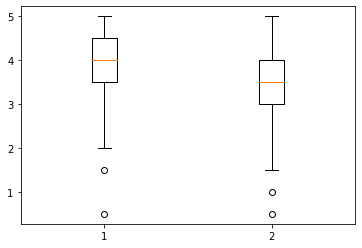

In [193]:
plt.boxplot([notas_toy_story.nota,notas_jumanji.nota])

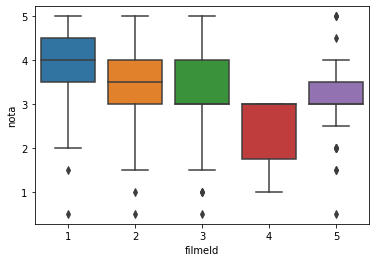

In [194]:
sns.boxplot(x='filmeId',y='nota',data=notas.query('filmeId in [1,2,3,4,5]'))

In [195]:
print("DesvP ToyStore %.2f"% notas_toy_story.nota.std())
print("DesvP Jumanji %.2f"% notas_jumanji.nota.std())

DesvP ToyStore 0.83
DesvP Jumanji 0.88
